In [58]:
import pandas as pd
from pandas import Grouper, DataFrame
from pandas.plotting import autocorrelation_plot

import numpy as np
import os
from datetime import datetime
from typing import List

from matplotlib import pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt

from typing import Tuple, List

### Constantes

In [4]:
DIR_DATASET: str = os.path.join('datasets', 'dados-gerados')

DATASET_OEC_MPME = os.path.join(DIR_DATASET,  'oec_mpme.csv')

DAT_CORRENTE = datetime.today().strftime("%Y-%m-%d")

In [ ]:
df_oec_mpme = pd.read_csv(DATASET_OEC_MPME, sep=';', decimal=',', parse_dates=True)
df_oec_mpme.index = pd.DatetimeIndex(df_oec_mpme.data_base)
df_oec_mpme["ano_mes"] = pd.DatetimeIndex(df_oec_mpme.data_base).strftime('%Y-%m')
df_oec_mpme_desembolso = df_oec_mpme[['desembolso','ano','mes', 'ano_mes']]
desembolso = df_oec_mpme_desembolso[["desembolso"]].to_numpy().squeeze()
desembolso_time = df_oec_mpme_desembolso[["ano_mes"]].to_numpy().squeeze()

In [9]:
def mse(observations: np.ndarray, estimates: np.ndarray):
    '''
    INPUT:
        observations - numpy array of values indicating observed values
        estimates - numpy array of values indicating an estimate of values
    OUTPUT:
        Mean Square Error value
    '''
    # check arg types
    assert type(observations) == type(np.array([])), "'observations' must be a numpy array"
    assert type(estimates) == type(np.array([])), "'estimates' must be a numpy array"
    # check length of arrays equal
    assert len(observations) == len(estimates), "Arrays must be of equal length"
    
    # calculations
    difference = observations - estimates
    sq_diff = difference ** 2
    mse = sum(sq_diff)
    
    return mse

In [28]:
def predict_by_moving_average(observations):
    return np.sum(observations) / observations.shape[0]

In [71]:
#
def prepare_test_window_dataset(full_dataset: np.ndarray, test_percentual_size: int, window_size: int) -> Tuple[np.ndarray, np.ndarray]:
    dataset_size: int = full_dataset.shape[0]
    cut_pos: int = round(dataset_size - (dataset_size * (test_percentual_size /100)))
    test_dataset_size: int = dataset_size - cut_pos
    
    train: np.ndarray = full_dataset[:cut_pos]
    
    test = [full_dataset[cut_pos + ind - window_size:cut_pos + ind] for ind in range (test_dataset_size)]
    
    return train, test

---

### Média Movel

In [64]:
window_size: int = 3
test_size: int = 10 #em percentual

In [72]:
train, test = prepare_test_window_dataset(desembolso, test_size, window_size)

In [60]:
ma_prediction:List = []
for t_index in range(len(test)):
    ma_prediction.append(predict_by_moving_average(test[t_index]))

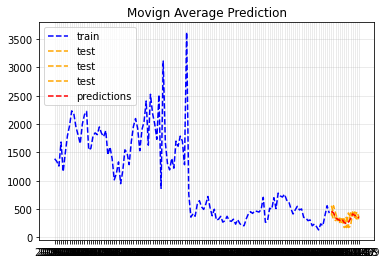

In [77]:
plt.plot(desembolso_time[:-len(test)], train, 'b--', label="train")
plt.plot(desembolso_time[-len(test):], test, color='orange', linestyle="--", label="test")
plt.plot(desembolso_time[-len(test):], ma_prediction, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Movign Average Prediction")
plt.grid(alpha=0.3);

In [73]:
len(train) + len(test)

144

In [74]:
print(desembolso)

[1388.5       1339.9       1259.6       1682.7       1160.7
 1493.        1793.9       1972.8       2231.7       2181.3
 1947.9       1808.5       1654.8       1997.        2164.
 2222.6       1543.9       1571.7       1783.        1844.6
 1812.5       1949.2       1837.5       1777.9       1884.3
 1455.        1596.7       1388.5       1015.7       1130.5
 1331.6        948.1       1174.3       1545.2       1496.9
 1284.1       1686.5       1958.1       2097.        1922.
 1529.8       1899.6       2044.9       2406.5       1627.8
 2524.6       2187.8       2002.        1731.3       2514.8
  865.8       3111.7       1673.2       1303.6       1191.9
 1395.1       1221.6       1698.5       1608.1       1786.9
 1699.8       1282.8       3619.4        765.8        357.3
  417.3        373.8        583.9        648.8        539.5
  493.7        585.8        722.4        525.7        382.
  497.5        304.9        321.6        372.4        270.1
  294.5        372.6        296.3        28

In [75]:
print(train)

[1388.5       1339.9       1259.6       1682.7       1160.7
 1493.        1793.9       1972.8       2231.7       2181.3
 1947.9       1808.5       1654.8       1997.        2164.
 2222.6       1543.9       1571.7       1783.        1844.6
 1812.5       1949.2       1837.5       1777.9       1884.3
 1455.        1596.7       1388.5       1015.7       1130.5
 1331.6        948.1       1174.3       1545.2       1496.9
 1284.1       1686.5       1958.1       2097.        1922.
 1529.8       1899.6       2044.9       2406.5       1627.8
 2524.6       2187.8       2002.        1731.3       2514.8
  865.8       3111.7       1673.2       1303.6       1191.9
 1395.1       1221.6       1698.5       1608.1       1786.9
 1699.8       1282.8       3619.4        765.8        357.3
  417.3        373.8        583.9        648.8        539.5
  493.7        585.8        722.4        525.7        382.
  497.5        304.9        321.6        372.4        270.1
  294.5        372.6        296.3        28

In [76]:
print(test)

[array([388.300147, 559.237454, 428.955021]), array([559.237454, 428.955021, 317.071145]), array([428.955021, 317.071145, 296.890366]), array([317.071145, 296.890366, 340.35196 ]), array([296.890366, 340.35196 , 262.908169]), array([340.35196 , 262.908169, 354.964396]), array([262.908169, 354.964396, 174.867487]), array([354.964396, 174.867487, 196.762797]), array([174.867487, 196.762797, 432.485975]), array([196.762797, 432.485975, 358.263753]), array([432.485975, 358.263753, 450.280997]), array([358.263753, 450.280997, 355.478147]), array([450.280997, 355.478147, 325.667389]), array([355.478147, 325.667389, 354.907705])]
